<a href="https://colab.research.google.com/github/mdsiam135/thesis_2025/blob/main/DT_5labels_70_15_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score # Add f1_score here
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/UpdatedDataset/data1.csv")

In [3]:
labels = ['very low', 'low', 'medium', 'high', 'very high']
df['Production_Label'], bin_edges = pd.qcut(df['Production (M.Ton)'], q=5, labels=labels, retbins=True)

In [4]:
# Show the bin ranges
print("Ranges for Production Categories:")
for i in range(len(bin_edges) - 1):
    print(f"{labels[i]}: {bin_edges[i]:.2f} to {bin_edges[i + 1]:.2f}")

Ranges for Production Categories:
very low: 0.00 to 562.60
low: 562.60 to 1483.40
medium: 1483.40 to 3121.62
high: 3121.62 to 6552.95
very high: 6552.95 to 710032.50


In [5]:
# Show value counts
print("\nCounts per Production Category:\n", df['Production_Label'].value_counts())


Counts per Production Category:
 Production_Label
very low     1127
very high    1127
low          1126
medium       1126
high         1126
Name: count, dtype: int64


In [6]:
# Step 2: Data preprocessing
# ----------------------------

# Drop the original production column
df.drop(columns=['Production (M.Ton)'], inplace=True)

# Encode categorical features
label_encoders = {}
for col in ['Crop', 'District']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
# Features and target
X = df.drop(columns=['Production_Label'])
y = df['Production_Label']

In [8]:
# First, split off 15% for test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

# Now split the remaining 85% into 70% train and 15% validation
# 70 / 85 = 0.8235 ≈ 0.8235 for the train proportion of the remaining data
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)

In [9]:
# Step 4: Decision Tree Model Training
# ----------------------------

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Step 5: Evaluation
# ----------------------------

# Validation predictions
y_val_pred = clf.predict(X_val)
val_report = classification_report(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_macro_f1 = f1_score(y_val, y_val_pred, average='macro')

In [11]:
# Test predictions
y_test_pred = clf.predict(X_test)
test_report = classification_report(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')

In [12]:
# Print classification reports
print("\n--- Validation Classification Report ---\n", val_report)
print("Macro F1 Score (Validation):", val_macro_f1)


--- Validation Classification Report ---
               precision    recall  f1-score   support

        high       0.71      0.69      0.70       169
         low       0.68      0.69      0.68       169
      medium       0.65      0.63      0.64       169
   very high       0.87      0.87      0.87       169
    very low       0.83      0.87      0.85       169

    accuracy                           0.75       845
   macro avg       0.75      0.75      0.75       845
weighted avg       0.75      0.75      0.75       845

Macro F1 Score (Validation): 0.7482269377217641


In [13]:
print("\n--- Test Classification Report ---\n", test_report)
print("Macro F1 Score (Test):", test_macro_f1)


--- Test Classification Report ---
               precision    recall  f1-score   support

        high       0.71      0.72      0.72       169
         low       0.72      0.67      0.70       169
      medium       0.68      0.68      0.68       169
   very high       0.88      0.89      0.89       169
    very low       0.85      0.88      0.86       169

    accuracy                           0.77       845
   macro avg       0.77      0.77      0.77       845
weighted avg       0.77      0.77      0.77       845

Macro F1 Score (Test): 0.768493072032582


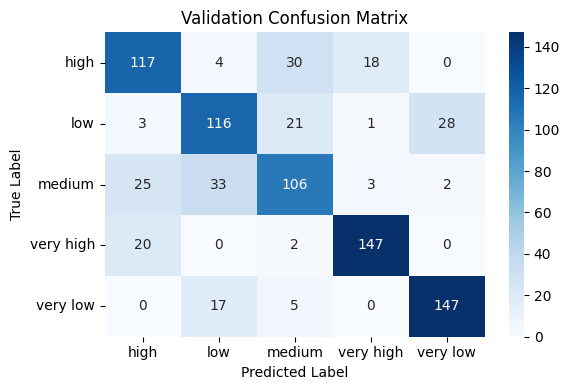

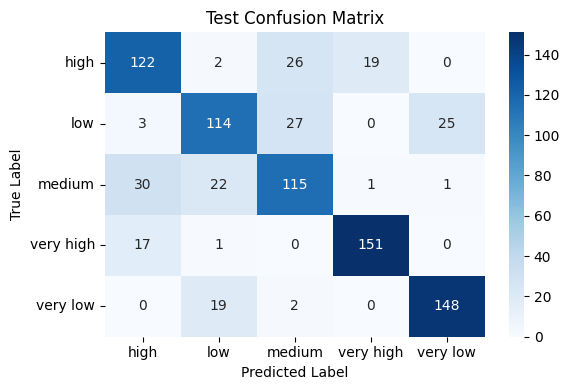

In [15]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(val_conf_matrix, 'Validation Confusion Matrix')
plot_confusion_matrix(test_conf_matrix, 'Test Confusion Matrix')